# Elife Paper 
## Figure 7: Lesion Experiment


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories;
# from make_json import parameter_names;
import json
from env_lite import Environment
from model import NN
from functions import *

In [3]:
wanted_directories = ["BG_INTACT_DAYS"] #["BG_NOISE", "LEARNING_RATE_RL", "REWARD_WINDOW", "LEARNING_RATE_HL","TARGET_WIDTH","ANNEALING", "JUMP_MID", "JUMP_SLOPE", "JUMP_FACTOR", "RA_SIG_SLOPE", "balance_factor","RA_NOISE"]#["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]                                       

In [4]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_b4cut = {}
data_aftercut = {}
data_end = {}
# data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_b4cutoff"):   
            filepath = os.path.join(directory, filename)
            data_b4cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_aftercutoff"):
            filepath = os.path.join(directory, filename)
            data_aftercut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_end"):
            filepath = os.path.join(directory, filename)
            data_end[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_b4cut.keys())
print(data_aftercut.keys())
print(data_end.keys())
print(parameter_values)

BG_INTACT_DAYS
contours
dict_keys(['BG_INTACT_DAYS'])
dict_keys(['BG_INTACT_DAYS'])
dict_keys(['BG_INTACT_DAYS'])
{'BG_INTACT_DAYS': array([10., 50., 40., 20., 30., 60.])}


In [5]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [6]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

In [7]:
# import seaborn as sns


# def plot_results_violin_3(data1, data2, data3, params, label):
#     # Scale returns to percentages
#     data1 = np.array(data1) * 100
#     data2 = np.array(data2) * 100
#     data3 = np.array(data3) * 100

#     # Sort parameter values and corresponding data
#     sorted_params = np.array(sorted(params))
#     sorted_indices = np.argsort(params)

#     data1 = data1[:, sorted_indices]
#     data2 = data2[:, sorted_indices]
#     data3 = data3[:, sorted_indices]

#     n_values = len(sorted_params)

#     # Arrays to store fraction above threshold
#     above_thresh1 = np.zeros(n_values)
#     above_thresh2 = np.zeros(n_values)
#     above_thresh3 = np.zeros(n_values)

#     data_flat1, data_flat2, data_flat3 = [], [], []
#     labels = []

#     for i in range(n_values):
#         col1 = data1[:, i]
#         col2 = data2[:, i]
#         col3 = data3[:, i]

#         above_thresh1[i] = np.sum(col1 > 70) / len(col1)
#         above_thresh2[i] = np.sum(col2 > 70) / len(col2)
#         above_thresh3[i] = np.sum(col3 > 70) / len(col3)

#         data_flat1.extend(col1)
#         data_flat2.extend(col2)
#         data_flat3.extend(col3)

#         labels.extend([sorted_params[i]] * len(col1))  # Same label repeated

#     # Start plotting
#     plt.figure(figsize=(14, 7))

#     # Plot violins (no label)
#     sns.violinplot(x=labels, y=data_flat1, inner=None, color='skyblue', alpha=0.4, linewidth=1)
#     sns.violinplot(x=labels, y=data_flat2, inner=None, color='orange', alpha=0.3, linewidth=1)
#     sns.violinplot(x=labels, y=data_flat3, inner=None, color='limegreen', alpha=0.3, linewidth=1)

#     # Plot stripplots (no label inside)
#     sns.stripplot(x=labels, y=data_flat1, size=2, color='skyblue', alpha=0.9, jitter=0.25)
#     sns.stripplot(x=labels, y=data_flat2, size=2, color='orange', alpha=0.9, jitter=0.25)
#     sns.stripplot(x=labels, y=data_flat3, size=2, color='limegreen', alpha=0.9, jitter=0.25)

#     # Threshold line
#     plt.axhline(70, color='red', linestyle='--')

#     # Annotate above threshold percentages
#     for i in range(n_values):
#         plt.text(i, 98, f"{100 * above_thresh1[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='blue')
#         plt.text(i, 92, f"{100 * above_thresh2[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='red')
#         plt.text(i, 86, f"{100 * above_thresh3[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='green')

#     # Manual legend
#     import matplotlib.patches as mpatches
#     legend_elements = [
#         mpatches.Patch(color='skyblue', label='Before Lesion'),
#         mpatches.Patch(color='orange', label='After Lesion'),
#         mpatches.Patch(color='limegreen', label='End'),
#         mpatches.Patch(color='red', label='Threshold = 70', linestyle='--')
#     ]
#     plt.legend(handles=legend_elements)

#     # Labels etc
#     plt.xlabel('Parameter set', fontsize=14)
#     plt.ylabel('Return %', fontsize=14)
#     plt.ylim(0, 105)
#     plt.title(f"Variability of performance for {label} with noise", fontsize=20)

#     plt.tight_layout()
#     plt.show()


# plot_results_violin_3(
#     data_b4cut['BG_INTACT_DAYS'],
#     data_aftercut['BG_INTACT_DAYS'],
#     data_end['BG_INTACT_DAYS'],
#     parameter_values['BG_INTACT_DAYS'],
#     label="cut"
# )


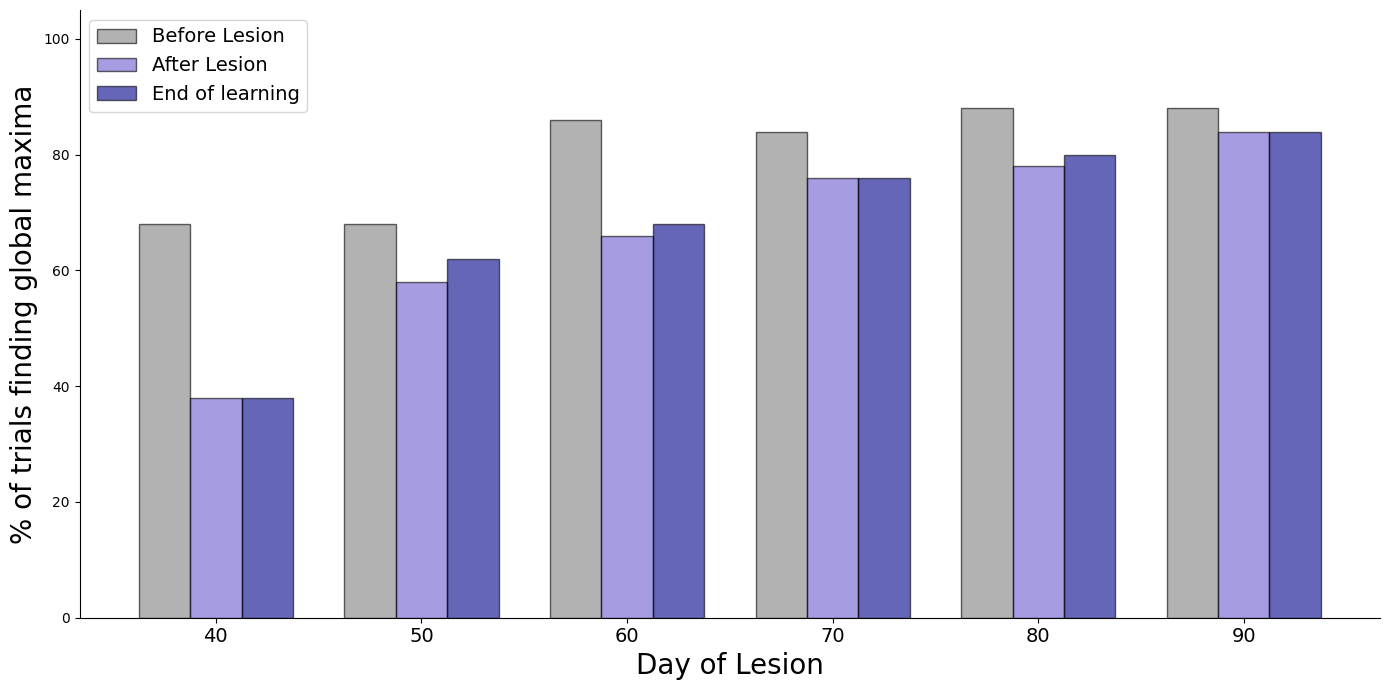

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results_bar_3(data1, data2, data3, params, label):
    # Scale returns to percentages
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    # Sort parameter values and corresponding data
    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]

    n_values = len(sorted_params)

    # Arrays to store fraction above threshold
    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

    # Start plotting
    plt.figure(figsize=(14, 7))

    bar_width = 0.25
    x = np.arange(n_values)

    plt.bar(x - bar_width, 100 * above_thresh1, width=bar_width, color='grey', alpha=0.6, edgecolor='black', label='Before Lesion')
    plt.bar(x,             100 * above_thresh2, width=bar_width, color='slateblue', alpha=0.6, edgecolor='black', label='After Lesion')
    plt.bar(x + bar_width, 100 * above_thresh3, width=bar_width, color='darkblue', alpha=0.6, edgecolor='black', label='End of learning')

    # plt.axhline(70, color='red', linestyle='--', label='Threshold = 70')

    # Labels and title
    plt.xlabel('Day of Lesion', fontsize=20)
    plt.ylabel('% of trials finding global maxima', fontsize=20)
    # plt.title(f"", fontsize=20)
    plt.xticks(x, [int(p+30) for p in sorted_params], fontsize =14)    # type: ignore
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(0, 105)
    plt.legend(loc = 2, fontsize=14)
    plt.tight_layout()
    plt.show()


# Usage example:
plot_results_bar_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut"
)


In [9]:
parameter_values['BG_INTACT_DAYS']

array([10., 50., 40., 20., 30., 60.])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

def plot_results_bar_3(data1, data2, data3, params, label, ax, filter_days=None):   
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]
    sorted_params = sorted_params  # Sorted

    if filter_days is not None:
        # Convert filter_days back to original params (subtract 30)
        filter_params = [d - 30 for d in filter_days]
        mask = np.isin(sorted_params, filter_params)
        data1 = data1[:, mask]
        data2 = data2[:, mask]
        data3 = data3[:, mask]
        sorted_params = sorted_params[mask]

    n_values = len(sorted_params)

    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

    bar_width = 0.1
    x = np.arange(n_values)

    ax.bar(x - 0.25, 100 * above_thresh1, width=bar_width, color='grey', alpha=0.9, edgecolor='black', label='Before Lesion')
    ax.bar(x,             100 * above_thresh2, width=bar_width, color='skyblue', alpha=0.9, edgecolor='black', label='After Lesion')
    ax.bar(x + 0.25, 100 * above_thresh3, width=bar_width, color='dodgerblue', alpha=0.9, edgecolor='black', label='End of learning')

    # ax.set_xlabel('Day of Lesion', fontsize=14)
    ax.set_ylabel('% of trials finding \nglobal maxima', fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([0, 100])
    ax.tick_params(labelsize=20)
    # ax.set_xticklabels([int(p+30) for p in sorted_params], fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 105)
    ax.legend(fontsize=12)
    # ax.set_title(f"Panel 1: {label}", fontsize=16)


### C.

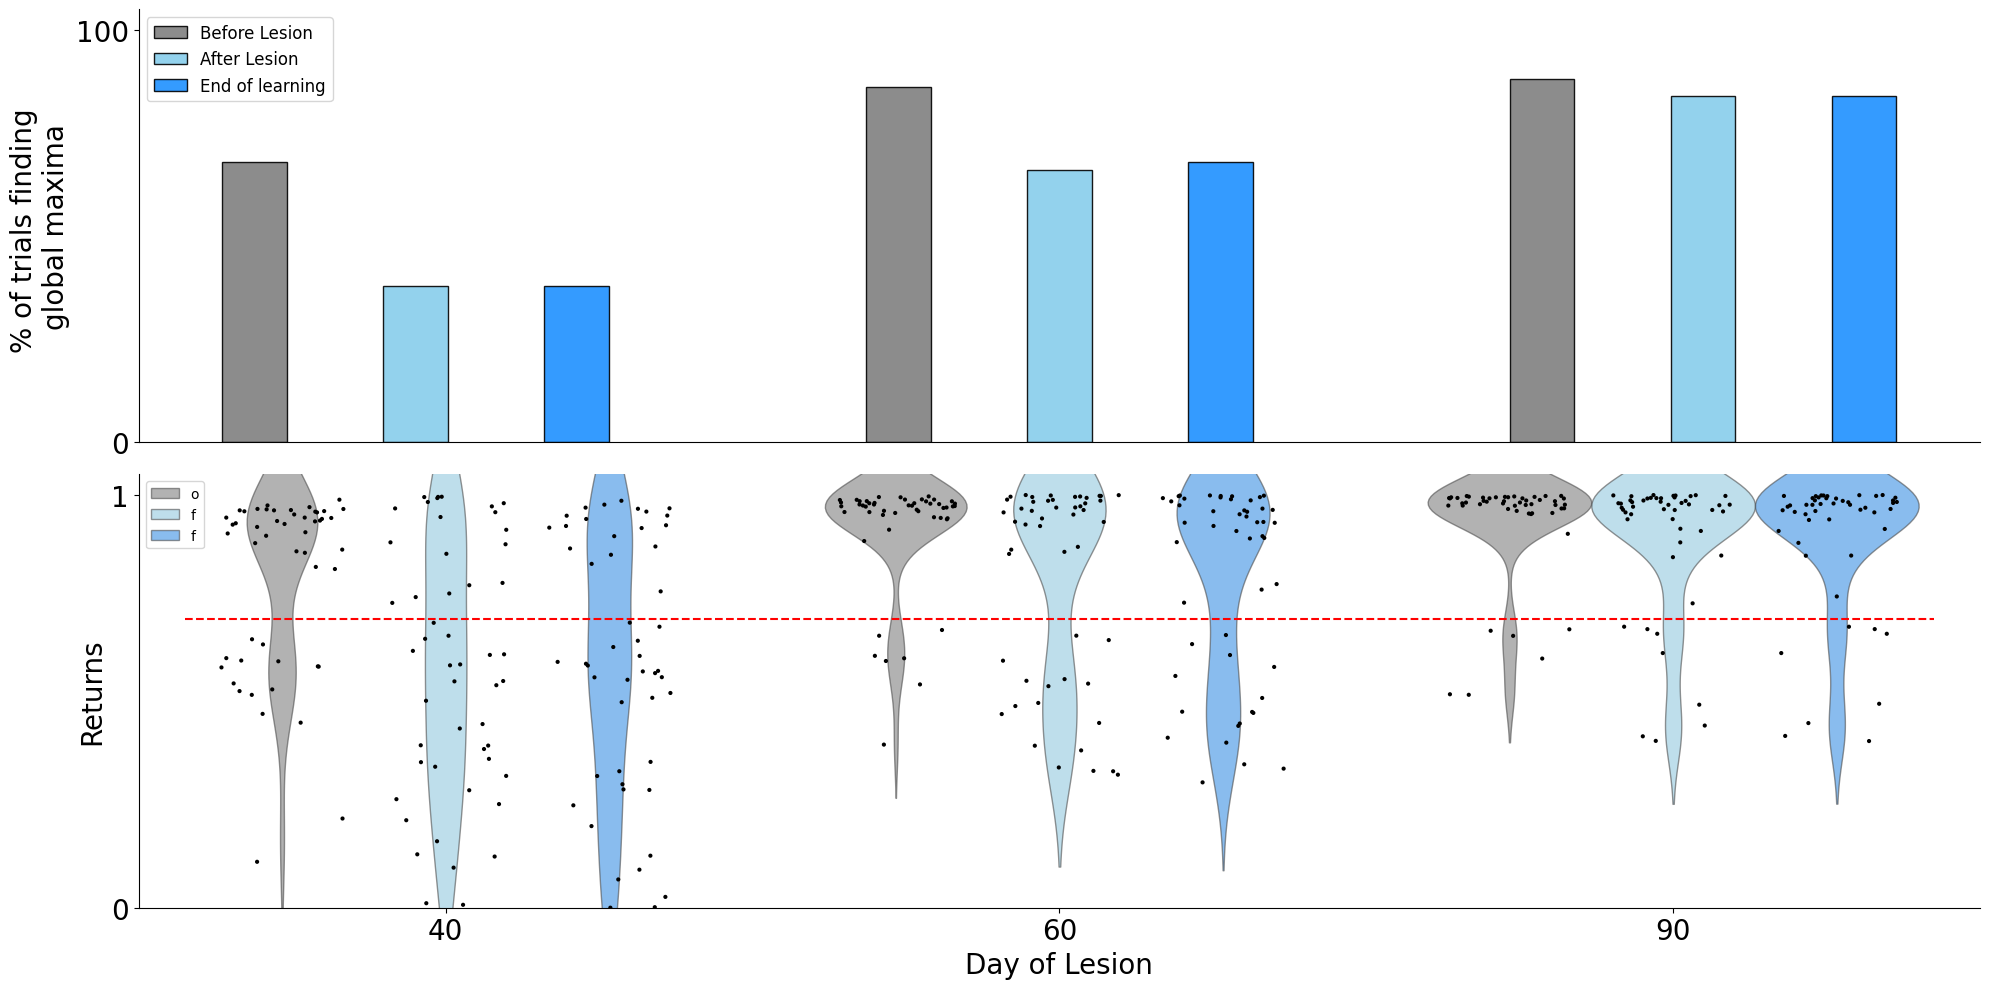

In [11]:


def plot_results_violin_3(data1, data2, data3, params, label, ax, filter_days=None):    
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]
    sorted_params = sorted_params

    if filter_days is not None:
        filter_params = [d - 30 for d in filter_days]
        mask = np.isin(sorted_params, filter_params)
        data1 = data1[:, mask]
        data2 = data2[:, mask]
        data3 = data3[:, mask]
        sorted_params = sorted_params[mask]

    n_values = len(sorted_params)

    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    data_flat1, data_flat2, data_flat3 = [], [], []
    labels_list = []

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

        data_flat1.extend(col1)
        data_flat2.extend(col2)
        data_flat3.extend(col3)

        labels_list.extend([int(sorted_params[i]+30)] * len(col1))

    # Convert to DataFrame-like for seaborn
    import pandas as pd
    df = pd.DataFrame({
        'Param': labels_list * 3,
        'Return %': data_flat1 + data_flat2 + data_flat3,
        'Condition': ['Before'] * len(data_flat1) + ['After'] * len(data_flat2) + ['End'] * len(data_flat3)
    })

    sns.violinplot(data=df, x='Param', y='Return %', hue='Condition', ax=ax, split=False, inner=None, linewidth=1, alpha=0.6, palette={'Before': 'grey', 'After': 'skyblue', 'End': 'dodgerblue'})
    sns.stripplot(data=df, x='Param', y='Return %', hue='Condition', ax=ax, size=3, jitter=0.30, dodge=True, palette={'Before': 'black', 'After': 'black', 'End': 'black'}, legend=False)

    ax.axhline(70, xmin= 0.025, xmax = 0.975, color='red', linestyle='--', label='Threshold = 70')  
    ax.set_xlabel('Day of Lesion', fontsize=20)
    ax.set_ylabel('Returns', fontsize=20)
    ax.set_ylim(0, 105)
    ax.set_yticks([0, 100], [0,1])
    ax.tick_params(labelsize=20)
    # ax.set_title(f"Panel 2: Variability of {label} performance", fontsize=16)
    # top and right spine remove
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend('off')

    # handles = [
    #     # mpatches.Patch(color='skyblue', label='Before Lesion'),
    #     # mpatches.Patch(color='slateblue', label='After Lesion'),
    #     # mpatches.Patch(color='darkblue', label='End'),
    #     mpatches.Patch(color='red', label='Threshold = 70')
    # ]
    # ax.legend(handles=handles, fontsize=10)

# def plot_rewards()

# =================
# Create the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Only show days 40, 60, 90 (i.e., params 10, 30, 60)
filter_days = [40, 60, 90]

plot_results_bar_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut",
    ax=axs[0],
    filter_days=filter_days
)

plot_results_violin_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut",
    ax=axs[1],
    filter_days=filter_days
)


# Leave Panel 3 and 4 empty for now
# axs[0].axis('off')
# axs[1].axis('off')

plt.tight_layout()
plt.show()


### B.

In [12]:
with open('params.json', "r") as f:
    parameters = json.load(f)
    N_SYLL = parameters['params']['N_SYLL']
    TRIALS = parameters['params']['TRIALS']
    DAYS = parameters['params']['DAYS']

print(f"N_SYLL: {N_SYLL}, TRIALS: {TRIALS}, DAYS: {DAYS}")  

N_SYLL: 20, TRIALS: 1000, DAYS: 61


In [13]:
# def plot_rewards()

RANDOM_SEED = 42
desired_days = [10, 30, 60]  # Only process these DAY values

neighboring_directories = find_neighboring_directories()

for directory in neighboring_directories:
    if directory in wanted_directories:
        nos_parameters = 0
        for potential_filename in os.listdir(directory):
            if potential_filename.startswith("parameters_") and potential_filename.endswith(".json"):
                # Extract day from filename: parameters_<day>.json
                try:
                    param_day = int(potential_filename.split("_")[1].split(".")[0])
                except ValueError:
                    print(f"Skipping file {potential_filename}: cannot extract day")
                    continue
                if param_day not in desired_days:
                    print(f"Skipping file {potential_filename}: day {param_day} not in desired days {desired_days}")
                    continue
                nos_parameters += 1

        print(f"Number of parameters: {nos_parameters} for directory {directory}")
        if nos_parameters == 0:
            print(f"No matching files in {directory}")
            continue

        param_order = np.zeros((nos_parameters))
        actions = np.zeros((nos_parameters, DAYS, TRIALS, 1, 2))
        rewards = np.zeros((nos_parameters, DAYS, TRIALS, 1))
        j = 0

        for potential_filename in os.listdir(directory):
            if potential_filename.startswith("parameters_") and potential_filename.endswith(".json"):
                try:
                    param_day = int(potential_filename.split("_")[1].split(".")[0])
                except ValueError:
                    continue
                if param_day not in desired_days:
                    continue

                print(f"Processing file: {potential_filename} with index {j}")
                if j >= nos_parameters:
                    print(f"Skipping file {potential_filename} as index {j} exceeds nos_parameters {nos_parameters}")
                    continue

                full_filename = os.path.join(directory, potential_filename)
                print(full_filename)
                with open(full_filename, "r") as f:
                    parameters = json.load(f)
                    N_SYLL = parameters['params']['N_SYLL']
                    if N_SYLL != 1:
                        raise ValueError('nos syllables needs to be 1')
                    print(f"Opening JSON file: {full_filename}")
                    annealing_val = parameters['params']['ANNEALING']
                    obj = Environment(RANDOM_SEED, parameters, NN)
                    obj.run(parameters, True)
                    actions[j, :, :] = obj.actions
                    rewards[j, :] = obj.rewards
                    param_order[j] = param_day
                    j += 1

# # Plot the results after the loop finishes
# plot_rewards_and_actions(rewards, actions, param_order, DAYS, TRIALS)


Skipping file parameters_20.json: day 20 not in desired days [10, 30, 60]
Skipping file parameters_40.json: day 40 not in desired days [10, 30, 60]
Skipping file parameters_50.json: day 50 not in desired days [10, 30, 60]
Number of parameters: 3 for directory BG_INTACT_DAYS
Processing file: parameters_10.json with index 0
BG_INTACT_DAYS/parameters_10.json
Opening JSON file: BG_INTACT_DAYS/parameters_10.json


  8%|▊         | 5/61 [00:01<00:15,  3.60it/s]

100%|██████████| 61/61 [00:15<00:00,  3.83it/s]


Processing file: parameters_30.json with index 1
BG_INTACT_DAYS/parameters_30.json
Opening JSON file: BG_INTACT_DAYS/parameters_30.json


100%|██████████| 61/61 [00:15<00:00,  3.95it/s]


Processing file: parameters_60.json with index 2
BG_INTACT_DAYS/parameters_60.json
Opening JSON file: BG_INTACT_DAYS/parameters_60.json


100%|██████████| 61/61 [00:15<00:00,  3.96it/s]


In [14]:
actions[0].shape

(61, 1000, 1, 2)

In [15]:
running_std(actions[0].reshape(DAYS*TRIALS,1,2),1).shape

(61000,)

Lesion at day 10.0
Lesion at day 30.0
Lesion at day 60.0


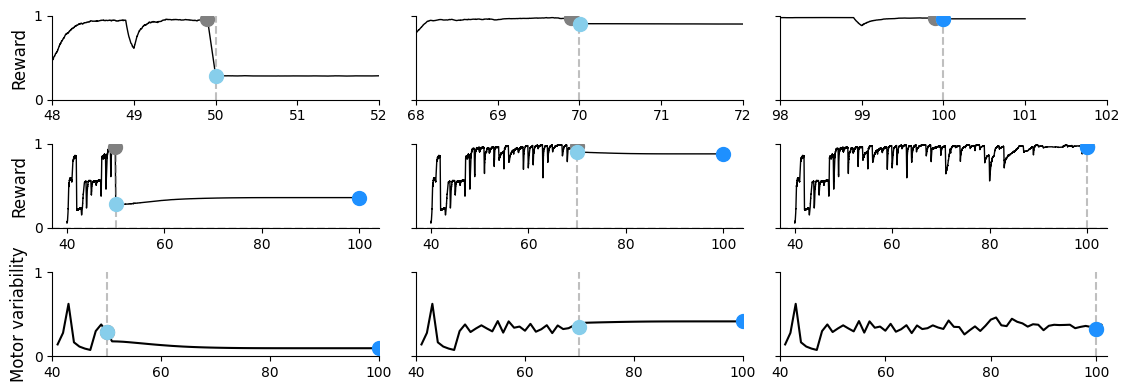

In [21]:

def running_mean(x, N=5):
        """ Returns the running average of an array. """
        rm = np.convolve(x, np.ones(N)/N, mode='valid')
        padded_rm = np.ones(np.shape(x)) * rm[-1]
        padded_rm[:rm.size] = rm

        return padded_rm

def plot_rewards_and_actions(rewards, actions, param_order, days, trials, smoothing=100):
    # Define colors for the points
    point_colors = {'Before': 'grey', 'After': 'skyblue', 'End': 'dodgerblue'}

    rewards = rewards.squeeze()  # (params, days, trials)
    actions = actions.squeeze()  # (params, days, trials, 2)

    fig, axs = plt.subplots(3, len(param_order), figsize=(4 * len(param_order), 4), sharey='row')
    if len(param_order) == 1:
        axs = np.expand_dims(axs, axis=1)

    for i, param_idx in enumerate(np.argsort(param_order)):
        lesion_day = param_order[param_idx]
        print(f"Lesion at day {lesion_day}")

        # Flatten data
        reward_data = rewards[param_idx].reshape(-1)
        action_data = actions[param_idx].reshape(-1, 2)
        time_axis = np.linspace(0, days, days * trials)

        # Smooth data
        smooth_reward = running_mean(reward_data, smoothing)
        smooth_x = running_mean(action_data[:, 0], smoothing)
        smooth_y = running_mean(action_data[:, 1], smoothing)
        smooth_time = time_axis[:len(smooth_reward)]

        # Plot full trajectories in black
        axs[0, i].plot(smooth_time + 40, smooth_reward, color='black', lw=1)
        axs[1, i].plot(smooth_time + 40, smooth_reward, color='black', lw=1)
        # axs[1, i].plot(smooth_time + 40, smooth_x, color='black', lw=1)
        # axs[1, i].plot(smooth_time + 40, smooth_y, color='black', lw=1, alpha=0.5)
        axs[0, i].axvline(lesion_day + 40, linestyle='--', color='grey', alpha=0.5)  # type: ignore
        axs[1, i].axvline(lesion_day + 40, linestyle='--', color='grey', alpha=0.5)  # type: ignore
        # Get 3 time points: before, after, end
        event_days = {'Before': lesion_day-0.1, 'After': lesion_day, 'End': 60}
        for label, day in event_days.items():
            # Find closest time in smoothed array
            mask = np.abs(smooth_time - day) < 0.1
            # axs[0, i].axvline(smooth_time[mask][0] + 40, linestyle='--', color=point_colors[label], alpha=0.5)          
            # axs[0, i].scatter(smooth_time[mask] + 40, smooth_reward[mask], color=point_colors[label], s=5, zorder=5)
            axs[0, i].scatter(smooth_time[int(day*TRIALS)] + 40, smooth_reward[int(day*TRIALS)], color=point_colors[label], s=100, zorder=5)
            # axs[1, i].scatter(smooth_time + 30, smooth_reward, color=point_colors[label], s=5, zorder=5)
            axs[1, i].scatter(smooth_time[int(day*TRIALS)] + 40, smooth_reward[int(day*TRIALS)], color=point_colors[label], s=100, zorder=5)
            # axs[1, i].scatter(smooth_time[mask] + 40, smooth_reward[mask], color=point_colors[label], s=5, zorder=5)
            # axs[1, i].scatter(smooth_time[mask] + 40, smooth_x[mask], color=point_colors[label], s=5, zorder=5)
            # axs[1, i].scatter(smooth_time[mask] + 40, smooth_y[mask], color=point_colors[label], s=5, zorder=5, alpha=0.5)

        # Formatting
        axs[0, i].set_xlim(40+lesion_day - 2, 40+lesion_day + 2)
        axs[0, i].set_ylim(0, 1)
        axs[0, i].set_yticks([0, 1])
        axs[0, i].tick_params(labelsize=10)
        # axs[0, i].set_xticks(40 + np.arange(0, days + 1, 20))
        axs[0, i].spines[['right', 'top']].set_visible(False)
        # axs[0, i].set_title(f"Lesion at {lesion_day}d", fontsize=12)

        axs[1, i].axhline(0, linestyle='--', color='black', alpha=0.1)
        axs[1, i].set_ylim(0, 1)
        axs[1, i].set_yticks([0, 1], [0, 1])
        axs[1, i].tick_params(labelsize=10)
        axs[1, i].set_xticks(40 + np.arange(0, days + 1, 20))
        axs[1, i].spines[['right', 'top']].set_visible(False)

        if i == 0:
            axs[0, i].set_ylabel("Reward", fontsize=12)
            axs[1, i].set_ylabel("Reward", fontsize=12)

        # Motor variability 
        
        motor_var = np.std(actions[param_idx], axis=2)  # (days, 2)
        mean_motor_var = np.mean(motor_var, axis=1)  # (days
        axs[2, i].plot(np.arange(1, days + 1) + 40, mean_motor_var, color='black')
        axs[2, i].axvline(lesion_day + 40, linestyle='--', color='grey', alpha=0.5)  # type: ignore
        for label, day in event_days.items():
            mask = np.abs(np.arange(1, days + 1) - day) < 0.1
            axs[2, i].scatter(np.arange(1, days + 1)[mask] + 40, mean_motor_var[mask], color=point_colors[label], s=100, zorder=5)
        axs[2, i].set_xlim(40+lesion_day - 2, 40+lesion_day + 2)
        axs[2, i].set_ylim(0, 1)
        axs[2, i].set_yticks([0, 1])
        axs[2, i].set_xticks(40 + np.arange(0, days + 1, 20))
        axs[2, i].tick_params(labelsize=10)
        axs[2, i].spines[['right', 'top']].set_visible(False)
        if i == 0:
            axs[2, i].set_ylabel("Motor variability", fontsize=12)

    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=8, label=lbl)   # type: ignore
               for lbl, col in point_colors.items()] # type: ignore
    # fig.legend(handles=handles, loc='upper right', frameon=False, fontsize=12)

    plt.tight_layout(rect=[0, 0, 0.95, 1])  #type: ignore
    plt.show()




plot_rewards_and_actions(rewards, actions, param_order, DAYS, TRIALS)